# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 '1.2 seoul_moving_month_4.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [1]:
import sys
import numpy as np
import pandas as pd

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = pd.read_csv("1.2 seoul_moving_month.csv")


In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 11)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,Unnamed: 0,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,2.892305e+07,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,7.141390e+05,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,4.753792e+05,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,0.000000e+00,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,3.012810e+05,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,6.556670e+05,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,1.082991e+06,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,1.871922e+06,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28923054 entries, 0 to 28923053
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   대상연월         int64 
 2   요일           object
 3   도착시간         int64 
 4   출발 시군구 코드    int64 
 5   도착 시군구 코드    int64 
 6   성별           object
 7   나이           int64 
 8   이동유형         object
 9   평균 이동 시간(분)  int64 
 10  이동인구(합)      object
dtypes: int64(7), object(4)
memory usage: 2.4+ GB


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head(3)

,Unnamed: 0,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,2,202204,일,0,11010,11010,F,0,HE,10,27.83


* 1번 열의 의미
    * " 2022년 4월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (Hint : value_counts())
seoul_moving['이동인구(합)'].value_counts()

*          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [8]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].replace("*","1.5")

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동인구(합)'].value_counts()

1.5        3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2352.37          1
1617.99          1
3141.86          1
1485.54          1
979.87           1
Name: 이동인구(합), Length: 135812, dtype: int64

In [10]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})

#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 0:00~ 4:59
seoul_moving.loc[seoul_moving['도착시간']<5]['요일'].value_counts()


토    423995
금    359012
일    331392
목    308651
수    303357
화    292786
월    273062
Name: 요일, dtype: int64

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

https://kimhongsi.tistory.com/entry/%ED%96%89%EC%A0%95%EA%B5%AC%EC%97%AD-%EC%BD%94%EB%93%9C-%EC%A0%95%EB%A6%AC-%EC%8B%9C%EB%8F%84-%EB%8B%A8%EC%9C%84-%EC%8B%9C%EA%B5%B0%EA%B5%AC-%EB%8B%A8%EC%9C%84

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_m = seoul_moving.loc[(seoul_moving['출발 시군구 코드']<20000)&(seoul_moving['도착 시군구 코드']<20000)]



In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10655895 entries, 0 to 28875005
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   대상연월         int64  
 2   요일           object 
 3   도착시간         int64  
 4   출발 시군구 코드    int64  
 5   도착 시군구 코드    int64  
 6   성별           object 
 7   나이           int64  
 8   이동유형         object 
 9   평균 이동 시간(분)  int64  
 10  이동인구(합)      float64
dtypes: float64(1), int64(7), object(3)
memory usage: 975.6+ MB


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (출발 시군구 코드)
seoul_m.groupby('출발 시군구 코드',as_index=False)['이동인구(합)'].sum()

,출발 시군구 코드,이동인구(합)
0,11010,19862431.70
1,11020,20296645.78
2,11030,15148400.31
3,11040,18121271.09
4,11050,18675122.83
5,11060,16973103.47
6,11070,14509927.80
7,11080,19558088.65
8,11090,13084060.28
9,11100,11253816.27


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. (도착 시군구 코드)
seoul_m.groupby('도착 시군구 코드',as_index=False)['이동인구(합)'].sum()

,도착 시군구 코드,이동인구(합)
0,11010,19809988.63
1,11020,20275545.43
2,11030,15247193.24
3,11040,18076235.50
4,11050,18715186.44
5,11060,16987577.97
6,11070,14518503.71
7,11080,19524264.96
8,11090,13079023.71
9,11100,11243990.02


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_N = seoul_m.loc[seoul_m['도착시간']>=5]


In [21]:
seoul_N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555938 entries, 2292255 to 28875005
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   대상연월         int64  
 2   요일           object 
 3   도착시간         int64  
 4   출발 시군구 코드    int64  
 5   도착 시군구 코드    int64  
 6   성별           object 
 7   나이           int64  
 8   이동유형         object 
 9   평균 이동 시간(분)  int64  
 10  이동인구(합)      float64
dtypes: float64(1), int64(7), object(3)
memory usage: 874.9+ MB


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [22]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
arr_sum = seoul_m.groupby('도착 시군구 코드',as_index=False)['평균 이동 시간(분)','이동인구(합)'].sum()
arr_sum.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5668\2635029465.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arr_sum = seoul_m.groupby('도착 시군구 코드',as_index=False)['평균 이동 시간(분)','이동인구(합)'].sum()


,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,10239340,19809988.63
1,11020,10285410,20275545.43
2,11030,9488120,15247193.24
3,11040,9952210,18076235.50
4,11050,9761770,18715186.44


In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
arr_mean = seoul_m.groupby('도착 시군구 코드',as_index=False)['평균 이동 시간(분)','이동인구(합)'].mean()
arr_mean.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5668\2375691194.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  arr_mean = seoul_m.groupby('도착 시군구 코드',as_index=False)['평균 이동 시간(분)','이동인구(합)'].mean()


,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.443330,41.486279
1,11020,21.166269,41.724896
2,11030,21.553622,34.636181
3,11040,21.950757,39.869241
4,11050,22.779081,43.671869


In [24]:
# 컬럼명을 변경해볼까요?
arr_sum = arr_sum.rename(columns={'평균 이동 시간(분)':'이동시간합계','이동인구(합)':'이동인구합계'})
arr_mean = arr_mean.rename(columns={'평균 이동 시간(분)':'평균이동시간','이동인구(합)':'평균이동인구'})

In [25]:
# 파일을 합쳐볼까요
arr = pd.merge(arr_sum,arr_mean, how = 'inner')
arr.head()

,도착 시군구 코드,이동시간합계,이동인구합계,평균이동시간,평균이동인구
0,11010,10239340,19809988.63,21.443330,41.486279
1,11020,10285410,20275545.43,21.166269,41.724896
2,11030,9488120,15247193.24,21.553622,34.636181
3,11040,9952210,18076235.50,21.950757,39.869241
4,11050,9761770,18715186.44,22.779081,43.671869


In [26]:
arr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도착 시군구 코드  25 non-null     int64  
 1   이동시간합계     25 non-null     int64  
 2   이동인구합계     25 non-null     float64
 3   평균이동시간     25 non-null     float64
 4   평균이동인구     25 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.2 KB


In [40]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
arr.to_csv("df_seoul_moving.csv", index = False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [28]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [29]:
arr2 = pd.merge(standard,arr)
arr2

,도착 시군구 코드,자치구,이동시간합계,이동인구합계,평균이동시간,평균이동인구
0,11010,종로구,10239340,19809988.63,21.443330,41.486279
1,11020,중구,10285410,20275545.43,21.166269,41.724896
2,11030,용산구,9488120,15247193.24,21.553622,34.636181
3,11040,성동구,9952210,18076235.50,21.950757,39.869241
4,11050,광진구,9761770,18715186.44,22.779081,43.671869
5,11060,동대문구,9998260,16987577.97,21.985940,37.355286
6,11070,중랑구,9102380,14518503.71,23.849072,38.039814
7,11080,성북구,10314120,19524264.96,22.508757,42.608281
8,11090,강북구,8765160,13079023.71,24.282441,36.233295
9,11100,도봉구,8053130,11243990.02,25.102882,35.049298


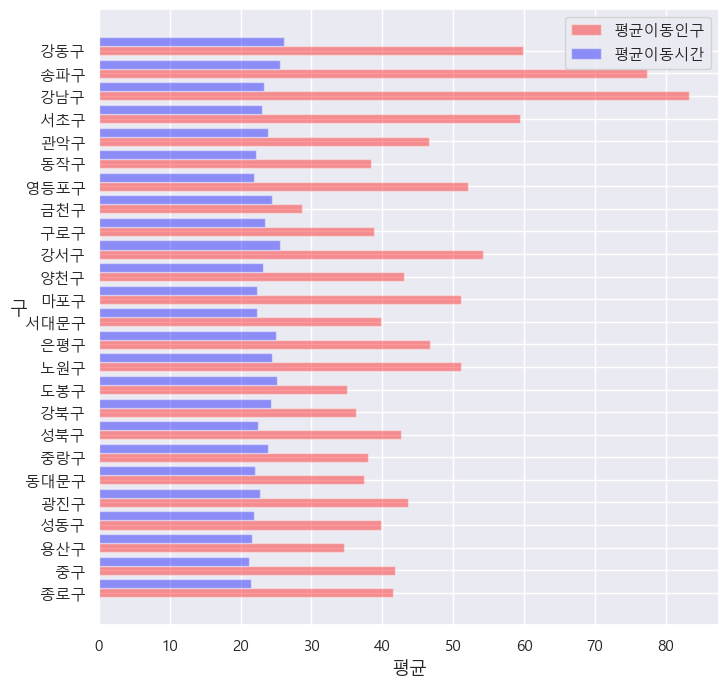

In [65]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

plt.figure(figsize=(8,8))
bar_width = 0.4
index = np.arange(25)
b1 = plt.barh(arr2['자치구'], arr2['평균이동인구'], bar_width, alpha=0.4, color='red', label='평균이동인구')
b2 = plt.barh(index + bar_width, arr2['평균이동시간'], bar_width, alpha=0.4, color='blue', label='평균이동시간')
plt.xlabel('평균', size = 13)
plt.ylabel('구', size = 13,rotation=0)
plt.legend()
plt.show()

In [30]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
arr.corr()

,도착 시군구 코드,이동시간합계,이동인구합계,평균이동시간,평균이동인구
도착 시군구 코드,1.000000,0.281161,0.478837,0.519835,0.609002
이동시간합계,0.281161,1.000000,0.934031,-0.142137,0.838273
이동인구합계,0.478837,0.934031,1.000000,0.045704,0.954598
평균이동시간,0.519835,-0.142137,0.045704,1.000000,0.315108
평균이동인구,0.609002,0.838273,0.954598,0.315108,1.000000


In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 이동시간합계와 평균이동시간은 큰 관련이 없다? 
# 2. 이동시간합계와 이동인구간에는 평균, 합계 둘다 큰 관련이 있었다.
# 3. 이동유형 변수?

---